<a href="https://colab.research.google.com/github/student-pornima26/CNN-Based-Plant-Disease-Prediction-for-Sustainable-Agriculture/blob/main/ANNpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
# import all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# divide the dataset into depenedent and independent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
# feature engineering
df_geodummies=pd.get_dummies(X['Geography'],drop_first=True)
df_geodummies.head()



,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [ ]:
# i just want to convert it into numeical value astype(int) value
df_geonumeric=df_geodummies.astype(int)
df_geonumeric.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [ ]:
df_gendummies=pd.get_dummies(X['Gender'],drop_first=True)
df_gendummies.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [ ]:
df_gennumeric=df_gendummies.astype(int)
df_gennumeric.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [ ]:
# concatenate these variable with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,df_geonumeric,df_gennumeric],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# Splitting the dataset into training set and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
# Part 2 Lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# letsintialize ANN
classifier=Sequential()

In [ ]:
# adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
# adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
# adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
# adam atuomatically give learning rate

In [ ]:
# Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7870 - loss: 0.4788 - val_accuracy: 0.8186 - val_loss: 0.4078
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8212 - loss: 0.4048 - val_accuracy: 0.8243 - val_loss: 0.3961
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8357 - loss: 0.3725 - val_accuracy: 0.8444 - val_loss: 0.3847
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8493 - loss: 0.3644 - val_accuracy: 0.8451 - val_loss: 0.3781
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8617 - loss: 0.3503 - val_accuracy: 0.8508 - val_loss: 0.3655
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8564 - loss: 0.3534 - val_accuracy: 0.8489 - val_loss: 0.3732
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8675 - loss: 0.3343 - val_accuracy: 0.8565 - val_loss: 0.3682
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8632 - loss: 0.3387 - val_accu

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

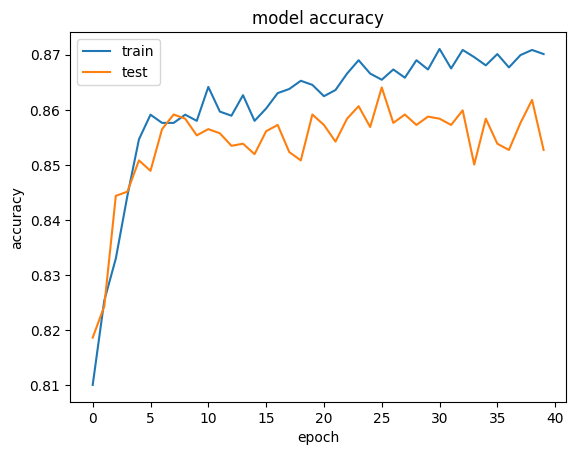

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

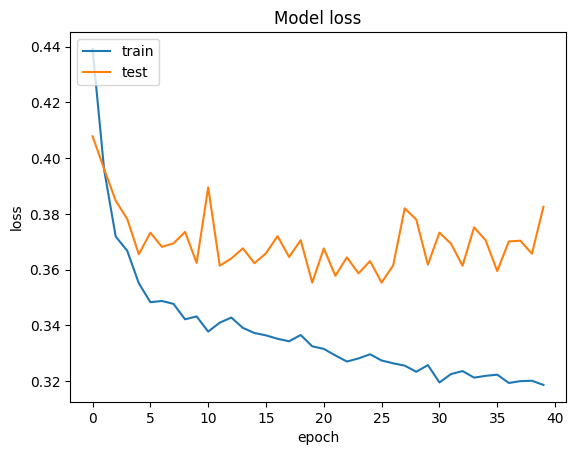

In [ ]:
#  summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the prediction and evaluating the model

# Predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1536,   59],
       [ 221,  184]])

In [ ]:
# Calcluate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.86

In [ ]:
# get the weight
classifier.get_weights()

[array([[-0.3514493 ,  0.3237804 ,  0.02201674, -0.3313545 ,  0.04116675,
         -0.02402465, -1.7073044 ,  0.2060165 , -0.12344776,  1.5722566 ,
          0.01171263],
        [ 2.4076505 , -1.3200119 ,  2.4587913 , -0.662765  , -2.4986308 ,
          0.25414652, -1.3746068 , -0.9616798 ,  0.9519409 , -1.9102936 ,
         -2.44656   ],
        [-0.6613119 ,  0.9455503 , -0.46002844, -0.0852116 , -0.6964576 ,
          0.54749703,  0.1842873 , -0.29712948,  0.2885951 ,  0.12816705,
          0.21842985],
        [ 1.1100581 , -2.951413  , -1.3697081 , -2.3787122 , -2.8346658 ,
         -2.9571877 ,  1.399179  , -0.9297767 , -0.35493892, -1.5509093 ,
         -0.36309296],
        [-1.0174617 ,  0.2642268 , -0.82565516, -1.1550812 , -1.0841749 ,
         -3.3494592 ,  0.15446647, -3.3590055 ,  3.4213874 , -0.28254396,
         -1.8955154 ],
        [-0.8412982 , -1.1949223 , -0.16277735,  0.11745679,  1.295728  ,
         -0.09061695, -0.2995168 , -0.162054  , -0.04118698,  1.3159939